# exo domicile 5 - hackaton santé

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



on exploite les sources de données suivantes:
- https://www.data.gouv.fr/fr/datasets/depenses-d-assurance-maladie-hors-prestations-hospitalieres-par-caisse-primaire-departement/ (fichier R de open damir)
- fichier complémentaire sur https://github.com/SGMAP-AGD/DAMIR:
    - fichier rpps (effectifs médecin 2013-2014 par spécialité)
    - fichier pop_par_dep_par_an_regroupe.csv (donnée insee sur la populuation)

In [2]:
data_path = "data/R_2014_sans_lib/"
liste = ['0'+str(i) if i <10 else str(i) for i in range(1,13)  ]
fichiers = [ "R2014"+x+"_sanslib.CSV" for x in liste]
fichierR_df = pd.concat([ pd.read_csv(data_path+file, sep=';', 
                          decimal=',',thousands='.',usecols=[0,17],dtype={'dep_mon':float}) for file in fichiers])


IOError: File data/R_2014_sans_lib/R201401_sanslib.CSV does not exist

les fichiers sont découpés par mois. 
on récuppére uniquement les colonnes 0 et 17 pour les 12 mois de 2014 dans un seul dataframe.
Enfin on s'intéresse au nombre de dépassement et non au montant des dépassements. 

In [ ]:
fichierR_df['count_dep']= list(map(lambda x: 1 if x > 0 else 0, fichierR_df['dep_mon']))
len(fichierR_df.index)
#replace with np.where

## Exploitation des données sur le nombre de medecin par spécialité par département

récuppération données sur les effectifs des medecins par specialités en 2014 apr département: 


specialite  Anatomie et cytologie pathologiques  Anesthésie-réanimation  \
dep                                                                       
01                                            6                      66   
02                                            8                      78   
03                                           10                      76   
04                                            4                      30   
05                                            4                      72   
06                                          102                     546   
07                                            0                      80   
08                                            6                      50   
09                                            0                      26   
10                                           12                      60   
11                                           10                     104   
12                       

,dep,specialite,annee,effectifs
0,01,Anatomie et cytologie pathologiques,10070,6
1,01,Anesthésie-réanimation,10070,66
2,01,Biologie médicale,10070,18
3,01,Cardiologie et maladies vasculaires,10070,46
4,01,Chirurgie générale,10070,20
5,01,Chirurgie infantile,10070,0
6,01,Chirurgie maxillo-faciale et stomatologie,10070,8
7,01,Chirurgie orthopédique et traumatologie,10070,26
8,01,Chirurgie plastique reconstructrice et esthétique,10070,2
9,01,Chirurgie thoracique et cardio-vasculaire,10070,0


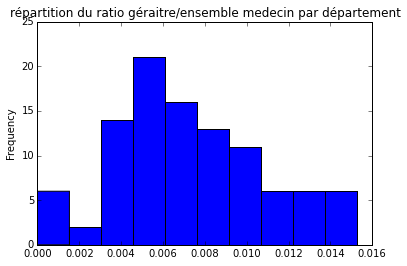

In [4]:
df_med = pd.read_csv("data/rpps_tab3.csv")
df_med= df_med[df_med['annee'] == 2014]
# récupération du code département.
regx = re.compile(r'([0-9]\w[0-9]?) -')
df_med['dep'] = list(map(lambda x: regx.search(x).groups()[0] if regx.search(x) else None , list(df_med['zone_inscription'].astype(str))))
#df_med.dropna() #removing non dep

df_med= df_med.groupby(['dep','specialite']).sum()
#print(df_med)
df_med = df_med.reset_index()
pivot_med = df_med.pivot(index='dep', columns='specialite', values='effectifs')
pivot_med.stack()
pivot_med['r_spe_tot'] = pivot_med['Spécialistes'] / pivot_med['Ensemble des spécialités d\'exercice']
pivot_med['r_ger_tot'] = pivot_med['Gériatrie'] / pivot_med['Ensemble des spécialités d\'exercice']
print(pivot_med)
pivot_med['r_ger_tot'].plot(kind='hist')
plt.axhline(0, color='k')
plt.title('répartition du ratio géraitre/ensemble medecin par département')
df_med

on travaille le fichier R pour rattacher les CPAM à un département (jointure avec le lexique)

In [5]:
lex = pd.read_csv("data/cpam-utf8.txt",sep=";")
df4 = pd.merge (fichierR_df, lex, left_on='cpam', right_on='cpam', how='left')
df5 = df4.groupby('dpt')['count_dep'].mean().reset_index()
#print(pd.unique(df4['dpt'].values.ravel()))
df5.head()





,dpt,count_dep
0,1,0.125218
1,10,0.087075
2,11,0.074436
3,12,0.065038
4,13,0.100518


count_dep                             1.000000
Gériatrie                             0.738922
Gynécologie médicale                  0.654971
Pédiatrie                             0.653324
O.R.L et chirurgie cervico faciale    0.650491
Gynécologie-obstétrique               0.639684
Ophtalmologie                         0.631163
Gastro-entérologie et hépatologie     0.629985
Oncologie option médicale             0.629289
Rhumatologie                          0.624104
Name: count_dep, dtype: float64

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


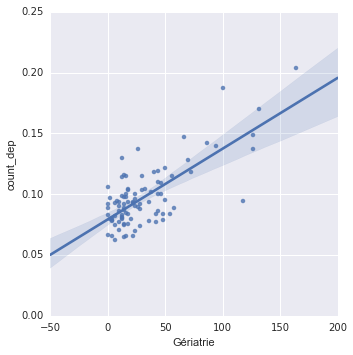

In [9]:
df6 = pd.merge(df5, pivot_med.reset_index(), left_on='dpt', right_on='dep', how='inner')
df6.head()
import seaborn as sns; sns.set(color_codes=True)
g = sns.lmplot(x="Gériatrie", y="count_dep", data=df6)
df6.corr()['count_dep'].sort_values(ascending=False).head(10)



In [6]:
test = pivot_med['Spécialistes'] + pivot_med['Généralistes'] - pivot_med['Ensemble des spécialités d\'exercice']
test.sum()

0

on constate que c'est le nombre de spécialiste en gériatrie 
qui semble avoir le plus d'impact sur le nombre de dépassement d'honoraire.

## Exploitation des données démographiques

In [7]:
dem = pd.read_csv("data/pop_par_dep_par_an_regroupe.csv",sep=";")
dem = dem[dem['annee'] > 2013]
#dem1 = dem.groupby(['dep','age_max_cat'])['value'].sum()
dem1 = dem.groupby('dep')['value'].sum().reset_index()
dem1.columns = ['dep','pop total']
print(pd.unique(dem1['dep'].values.ravel()))

['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '21' '22' '23'
 '24' '25' '26' '27' '28' '29' '2A' '2B' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76'
 '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '9'
 '90' '91' '92' '93' '94' '95' '971' '972' '973' '974']


In [10]:
df7 = pd.merge(df6, dem1, left_on='dpt', right_on='dep', how='inner')


In [11]:
df7.head()

,dpt,count_dep,dep_x,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie infantile,Chirurgie maxillo-faciale et stomatologie,...,Radio-thérapie,Recherche médicale,Rhumatologie,Réanimation médicale,Santé publique et médecine sociale,Spécialistes,r_spe_tot,r_ger_tot,dep_y,pop total
0,10,0.087075,10,12,60,14,42,24,0,8,...,8,0,14,2,4,710,0.483651,0.009537,10,306490
1,11,0.074436,11,10,104,26,72,22,0,14,...,10,0,36,2,4,1032,0.476454,0.006464,11,367158
2,12,0.065038,12,6,54,8,48,26,0,12,...,6,0,18,4,4,658,0.445799,0.009485,12,275063
3,13,0.100518,13,138,1058,238,674,288,44,130,...,58,2,200,26,148,10188,0.576766,0.002491,13,1996351
4,14,0.092752,14,38,254,50,158,94,8,44,...,36,0,44,2,42,2600,0.539419,0.004564,14,690836


correlation entre la demographie d'un dep et le taux de dep hon: % 0.593354111961


/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


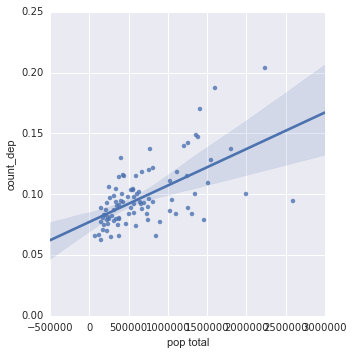

In [12]:
print( "correlation entre la demographie d'un dep et le taux de dep hon: %", df7.corr()['count_dep']['pop total'])
g = sns.lmplot(x="pop total", y="count_dep", data=df7)

la densité de population ne semble pas la variable la plus pertinente pour expliquer le taux de dépassement d'honoraire.

In [13]:
dem2 = dem.groupby(['dep','age_max_cat'])['value'].sum()

In [14]:
dem3 = dem2.transpose().reset_index().pivot(index='dep',columns='age_max_cat',values='value').reset_index()

dem3

In [15]:
dem3.columns

Index(['dep',   4.0,   9.0,  14.0,  19.0,  24.0,  29.0,  34.0,  39.0,  44.0,
        49.0,  54.0,  59.0,  64.0,  69.0,  74.0,  79.0,  84.0,  89.0,  94.0,
         inf],
      dtype='object', name='age_max_cat')

In [17]:
df8 = pd.merge(df6, dem3, left_on='dpt', right_on='dep', how='inner')
df8.columns

Index([                                              'dpt',
                                               'count_dep',
                                                   'dep_x',
                     'Anatomie et cytologie pathologiques',
                                  'Anesthésie-réanimation',
                                       'Biologie médicale',
                     'Cardiologie et maladies vasculaires',
                                      'Chirurgie générale',
                                     'Chirurgie infantile',
               'Chirurgie maxillo-faciale et stomatologie',
                 'Chirurgie orthopédique et traumatologie',
       'Chirurgie plastique reconstructrice et esthétique',
               'Chirurgie thoracique et cardio-vasculaire',
                                    'Chirurgie urologique',
                                    'Chirurgie vasculaire',
                        'Chirurgie viscérale et digestive',
                            'Dermatologi

In [18]:
liste = { x: df8.corr()[x]['Anatomie et cytologie pathologiques':'Spécialistes'].sort_values(ascending=False).head(10) for x in dem3.columns[1:]}

In [86]:
liste.get(4.0)

Médecine générale                      0.906135
Généralistes                           0.906135
Gériatrie                              0.864939
Gynécologie-obstétrique                0.839551
Médecine physique et réadaptation      0.835050
Chirurgie urologique                   0.830220
Gastro-entérologie et hépatologie      0.828617
Ensemble des spécialités d'exercice    0.824762
Pneumologie                            0.816440
Cardiologie et maladies vasculaires    0.815588
Name: 4.0, dtype: float64

Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?
Il n'y a pas de corrélation forte entre bébé et pédiatre, personnes agées / gériatres ou infirmiers ...


In [76]:
liste.get(4.0)

Médecine générale                      0.906135
Généralistes                           0.906135
Gériatrie                              0.864939
Gynécologie-obstétrique                0.839551
Médecine physique et réadaptation      0.835050
Chirurgie urologique                   0.830220
Gastro-entérologie et hépatologie      0.828617
Ensemble des spécialités d'exercice    0.824762
Pneumologie                            0.816440
Cardiologie et maladies vasculaires    0.815588
Name: 4.0, dtype: float64

In [20]:
df5.groupby('dpt')['count_dep'].sum().sort_values(ascending=False)

dpt
75     0.203970
92     0.187787
78     0.170145
94     0.148355
77     0.146750
91     0.142158
95     0.139872
69     0.137212
74     0.136971
971    0.129792
93     0.128556
1      0.125218
60     0.121774
68     0.119518
67     0.118330
45     0.118324
73     0.115555
38     0.115345
27     0.115179
28     0.114866
972    0.114544
6      0.113087
83     0.110471
33     0.109153
973    0.105972
71     0.104571
89     0.103965
84     0.103427
21     0.103407
17     0.101783
         ...   
61     0.081795
19     0.081607
5      0.081542
2B     0.080833
88     0.080222
47     0.079621
87     0.079454
82     0.079390
62     0.078859
3      0.078523
43     0.078469
56     0.078378
53     0.078091
90     0.077529
8      0.077031
29     0.076785
70     0.075374
66     0.075202
32     0.074725
11     0.074436
22     0.073718
46     0.070239
65     0.069874
9      0.067148
23     0.066750
81     0.065920
974    0.065856
48     0.065621
12     0.065038
15     0.062445
Name: count_dep, dty

In [21]:
from pandas.tools.plotting import scatter_matrix

KeyboardInterrupt: 

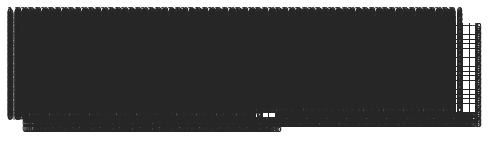

In [22]:
df8

In [33]:
listef = [ 4.0,
                                                       9.0,
                                                      14.0,
                                                      19.0,
                                                      24.0,
                                                      29.0,
                                                      34.0,
                                                      39.0,
                                                      44.0,
                                                      49.0,
                                                      54.0,
                                                      59.0,
                                                      64.0,
                                                      69.0,
                                                      74.0,
                                                      79.0,
                                                      84.0,
                                                      89.0,
                                                      94.0
                                                    ]

In [27]:
df9 = df8[['dpt','count_dep','Généralistes','Pédiatrie','Médecine générale','Spécialistes']]

In [46]:
df10 = pd.DataFrame(df8[dem3.columns[1:-1]])

In [60]:
df10[[4.0,9.0]].sum(axis=1)
df10[[]]

0      37929
1      40415
2      28390
3     242402
4      81438
5      13730
6      37703
7      65144
8      32758
9      23575
10     58801
11     68335
12     10606
13     40125
14     67560
15     62465
16     80363
17     57992
18    101897
19     14533
20     18224
21     86639
22    156008
23     19088
24    173942
25    124784
26    132366
27     22790
28     69350
29    162567
       ...  
61     28596
62     60706
63     71226
64     50524
65    101111
66    223497
67    154598
68    199485
69    194942
70     44100
71     69263
72     41628
73     31592
74    108443
75     66459
76     81393
77     49733
78     40254
79     41553
80     40002
81     17968
82    179797
83    218628
84    247767
85    185808
86    180161
87     51599
88     43547
89     57350
90    130541
dtype: int64